# MNIST Digit Classification 

## Packeges

In [69]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Load Dataset

In [70]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [71]:
X_train.shape

(60000, 28, 28)

In [72]:
y_train.shape

(60000,)

In [73]:
X_test.shape

(10000, 28, 28)

In [74]:
y_test.shape

(10000,)

In [75]:
X_train[0].ptp()

255

In [76]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Validation dataset

In [77]:
X_valid = X_train[:5000]
y_valid = y_train[:5000]

In [78]:
X_valid.shape, y_valid.shape

((5000, 28, 28), (5000,))

## Normelization

In [79]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

## Display the images

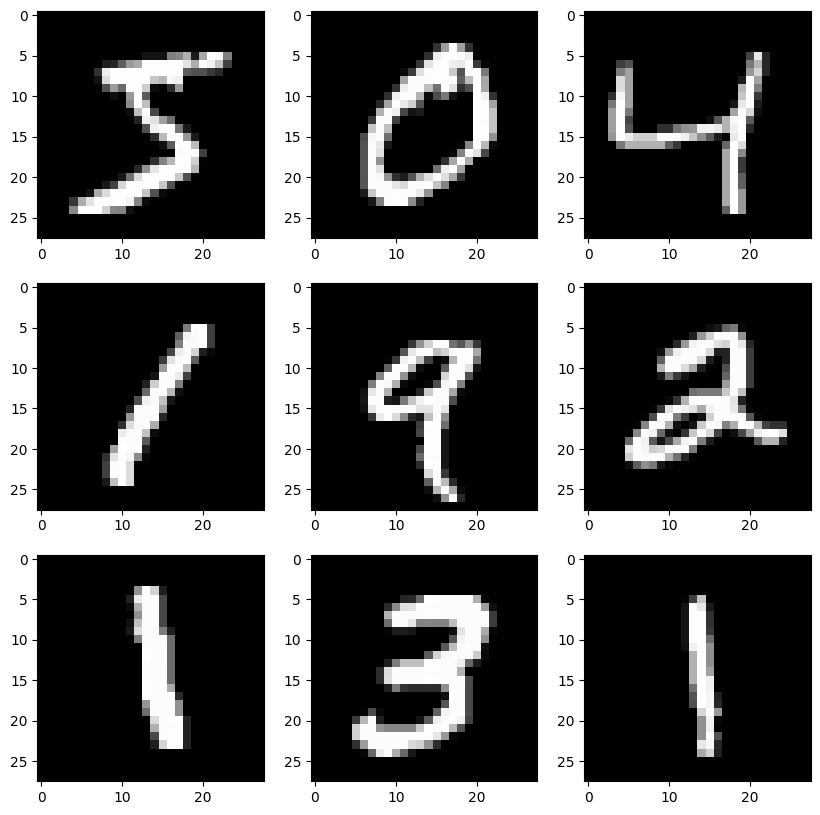

In [80]:
fig, aXes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):        
        aXes[i, j].imshow(X_train[a], cmap=plt.get_cmap('gray'))
        a = a + 1

In [81]:
y_train[0]

5

In [82]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

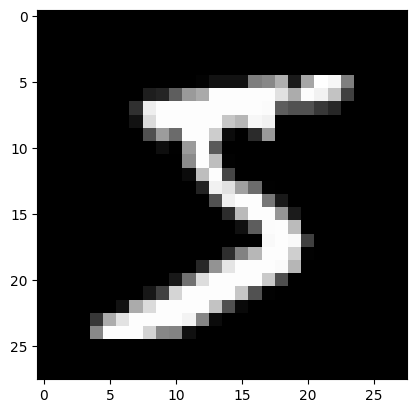

In [83]:
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

## Model prepration

In [250]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [84]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28,28]))
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))


2023-12-05 16:27:01.556710: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-05 16:27:01.560581: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-05 16:27:01.560846: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-05 16:27:01.561891: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuil

In [251]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 300)              

In [252]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# sparse_categorical_crossentropy

## Training

In [253]:
epochs = 20
history = model.fit(X_train,y_train, validation_data=(X_valid,y_valid), batch_size=32, epochs=epochs )

Epoch 1/20


2023-12-05 18:16:15.692183: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101


1875/1875 [==============================] - 14s 2ms/step - loss: 0.5353 - accuracy: 0.8405 - val_loss: 0.1648 - val_accuracy: 0.9522
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1355 - accuracy: 0.9578 - val_loss: 0.0883 - val_accuracy: 0.9730
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0934 - accuracy: 0.9711 - val_loss: 0.0654 - val_accuracy: 0.9806
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0742 - accuracy: 0.9770 - val_loss: 0.0512 - val_accuracy: 0.9840
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0621 - accuracy: 0.9809 - val_loss: 0.0540 - val_accuracy: 0.9826
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0535 - accuracy: 0.9833 - val_loss: 0.0404 - val_accuracy: 0.9882
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0337 - val_accuracy: 0.9906
Ep

## Evaluation

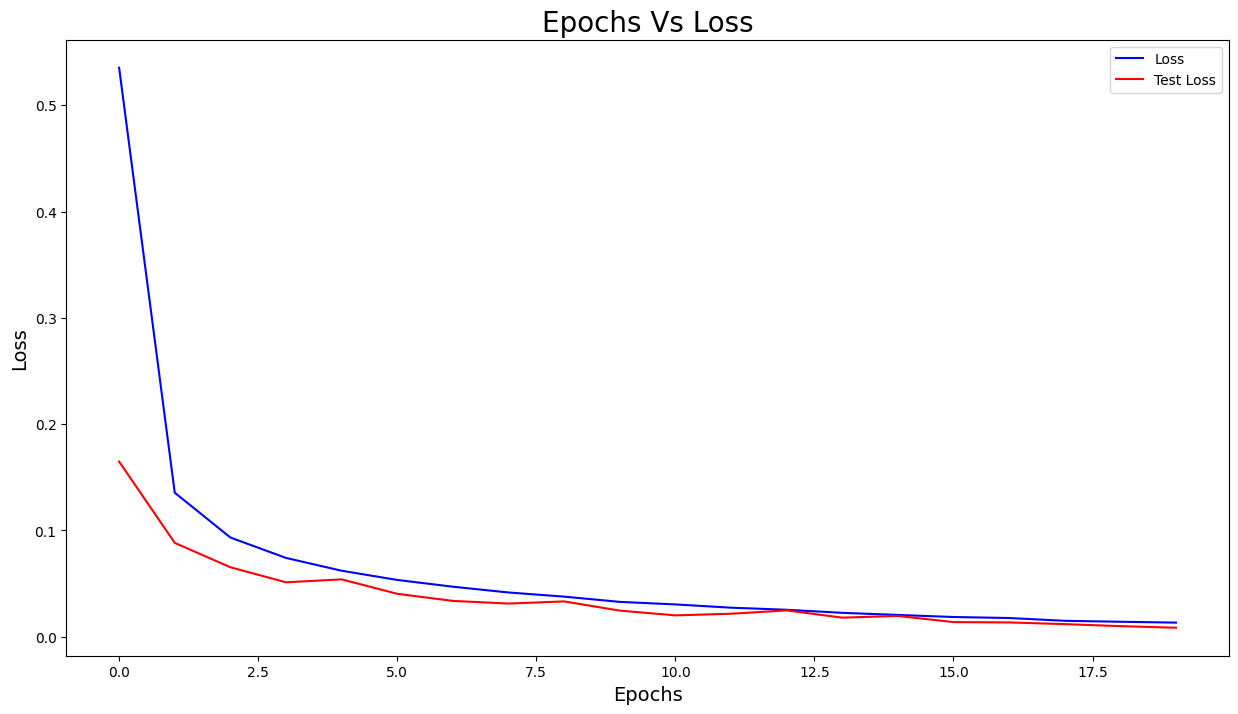

In [254]:
plt.figure(figsize=(15,8))
plt.plot(range(0, epochs), history.history["loss"], color="b", label="Loss")
plt.plot(range(0, epochs), history.history["val_loss"], color="r", label="Test Loss")
plt.title('Epochs Vs Loss', size=20)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', size=14)
plt.legend()
plt.show()

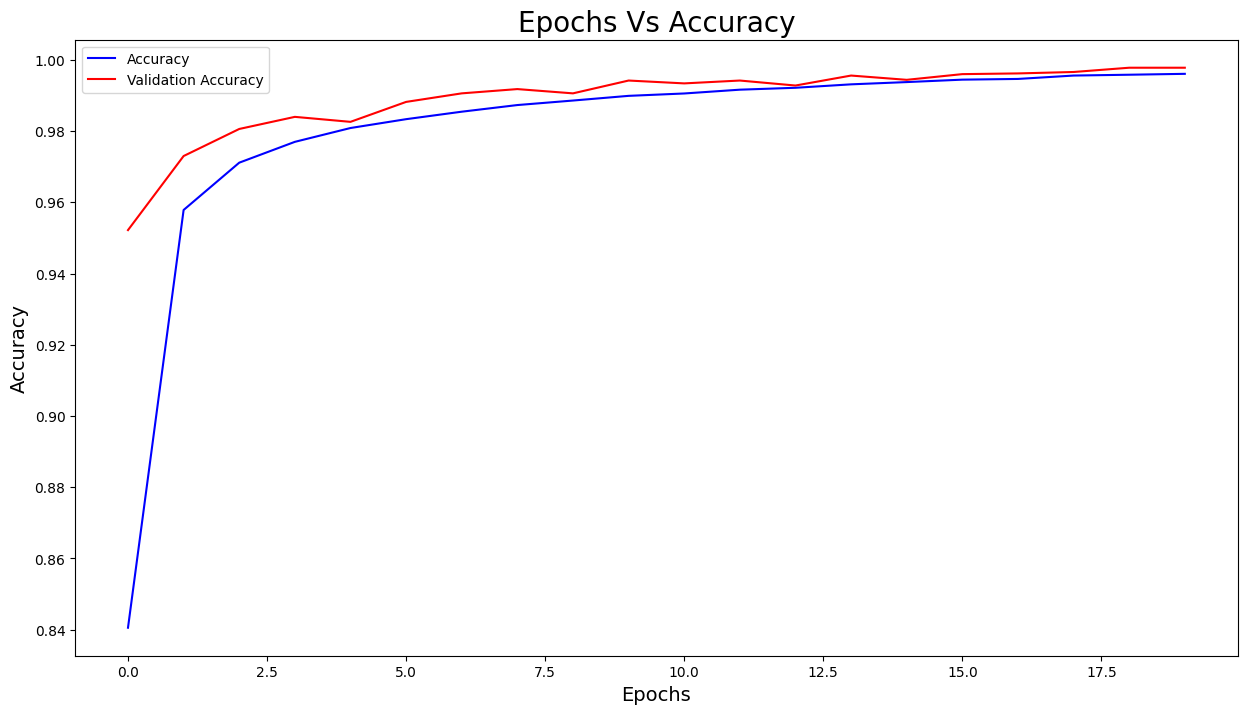

In [255]:
plt.figure(figsize=(15,8))
plt.plot(range(0, epochs), history.history["accuracy"], color="b", label="Accuracy")
plt.plot(range(0, epochs), history.history["val_accuracy"], color="r", label="Validation Accuracy")
plt.title('Epochs Vs Accuracy', size=20)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracy', size=14)
plt.legend()
plt.show()

In [256]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 926us/step - loss: 0.0315 - accuracy: 0.9898


[0.031486671417951584, 0.989799976348877]

In [257]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

313/313 [==============================] - 0s 631us/step


array([7, 2, 1, ..., 4, 5, 6])

In [258]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

In [259]:
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    0,    0,    0,    1,    1,    1,    1,    0],
       [   3, 1125,    1,    0,    0,    0,    1,    1,    4,    0],
       [   1,    2, 1027,    0,    1,    0,    0,    1,    0,    0],
       [   0,    0,    1, 1004,    0,    3,    0,    0,    1,    1],
       [   0,    0,    1,    0,  972,    0,    1,    0,    1,    7],
       [   1,    0,    0,    6,    0,  882,    2,    0,    1,    0],
       [   5,    2,    0,    1,    2,    2,  946,    0,    0,    0],
       [   0,    1,    5,    0,    0,    0,    0, 1013,    3,    6],
       [   4,    0,    1,    1,    0,    0,    1,    2,  963,    2],
       [   1,    2,    1,    1,    4,    3,    1,    4,    2,  990]],
      dtype=int32)>

In [260]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [261]:
y_classes

array([7, 2, 1, ..., 4, 5, 6])

In [262]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [263]:
precision_score(y_test, y_classes, average='micro')


0.9898

In [264]:
recall_score(y_test, y_classes, average='micro')

0.9898

In [266]:
import seaborn as sb   

# ax = plt.figure(figsize=(8, 6))
fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  
class_names = ["0","1","2","3","4","5","6","7","8","9"]
# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names) 
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)

ValueError: Must pass 2-d input. shape=()

##  Inference

In [267]:
import cv2
import numpy as np

In [268]:
img = cv2.imread('/home/appy1/Downloads/9.jpeg')

In [269]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (21,21), 0)
thresh = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY_INV)[1]

In [270]:
img.shape

(225, 225, 3)

In [271]:
thresh = cv2.resize(thresh, (28,28))

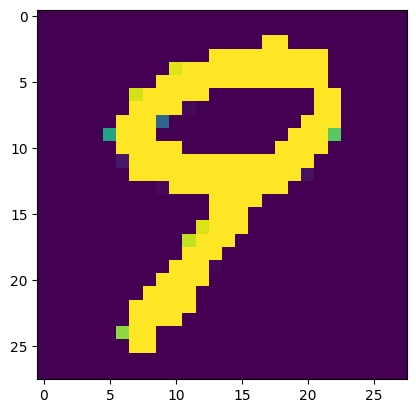

In [272]:
plt.imshow(thresh)

In [273]:
thresh= thresh/255

In [274]:
thresh.shape

(28, 28)

In [275]:
thresh

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [278]:
im = np.expand_dims(thresh, -1)[None]
im.shape

(1, 28, 28, 1)

In [280]:
cl = model.predict(im)

1/1 [==============================] - 0s 33ms/step


In [237]:
class_names[np.argmax(cl)]

'8'